# Dataset Description and Problem Statement

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
with open("/content/drive/My Drive/Colab Notebooks/traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("/content/drive/My Drive/Colab Notebooks/traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("/content/drive/My Drive/Colab Notebooks/traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

# Taking a peek at the data

1

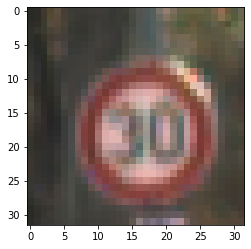

In [ ]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

7

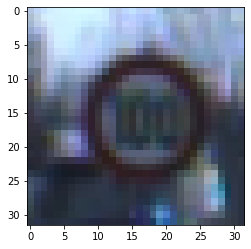

In [ ]:
i = 3001
plt.imshow(X_validation[i])
y_validation[i]

29

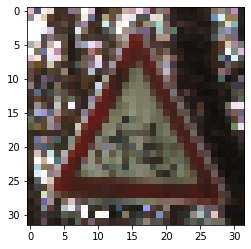

In [ ]:
i = 2100
plt.imshow(X_test[i])
y_test[i]

# Prepare the data 

* In this section, we will preprocess the data to get it ready to feed it into our neural network by:
  * shuffling it
  * converting images to gray scale to minimize computational expense
  * normalizing the data to get input magnitudes between 0 and 1


In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [ ]:
X_train_gray_norm

array([[[[-0.82291667],
         [-0.859375  ],
         [-0.890625  ],
         ...,
         [-0.890625  ],
         [-0.8359375 ],
         [-0.71614583]],

        [[-0.82291667],
         [-0.8671875 ],
         [-0.88802083],
         ...,
         [-0.88541667],
         [-0.81510417],
         [-0.64322917]],

        [[-0.83072917],
         [-0.8671875 ],
         [-0.88020833],
         ...,
         [-0.86197917],
         [-0.796875  ],
         [-0.70833333]],

        ...,

        [[-0.88541667],
         [-0.875     ],
         [-0.8828125 ],
         ...,
         [-0.88020833],
         [-0.89322917],
         [-0.89583333]],

        [[-0.88541667],
         [-0.87239583],
         [-0.8671875 ],
         ...,
         [-0.88802083],
         [-0.89583333],
         [-0.89322917]],

        [[-0.8671875 ],
         [-0.8515625 ],
         [-0.8515625 ],
         ...,
         [-0.890625  ],
         [-0.89583333],
         [-0.89322917]]],


       [[[ 0.1015625 ],


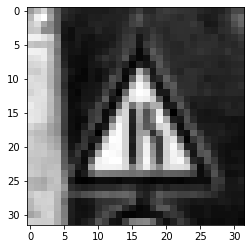

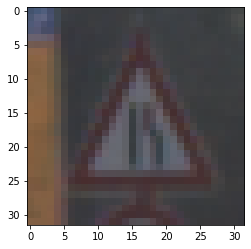

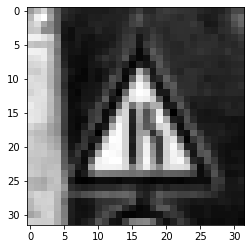

In [ ]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

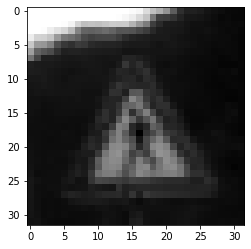

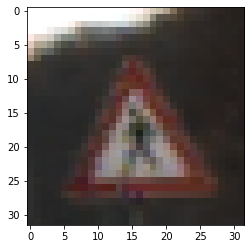

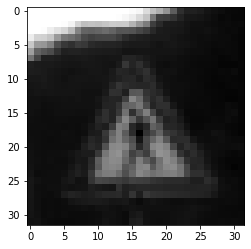

In [ ]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

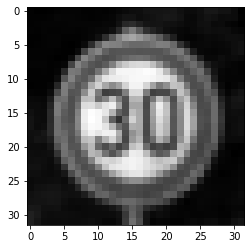

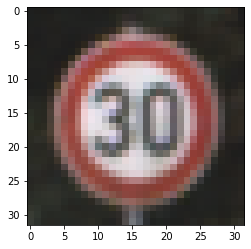

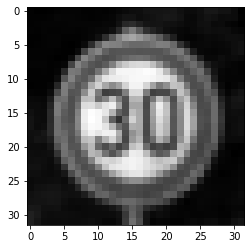

In [ ]:
i = 500
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

# Training the model

We'll be constructing our model following the architecture proposed 
by researcher Yann LeCun, (here is a link for the original paper 
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf ).

* STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
  * Input = 32x32x1
  * Output = 28x28x6
  * Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
  * Used a 5x5 Filter with input depth of 3 and output depth of 6
  * Apply a RELU Activation function to the output
pooling for input, Input = 28x28x6 and Output = 14x14x6

* STEP 2: THE SECOND CONVOLUTIONAL LAYER #2

  * Input = 14x14x6
  * Output = 10x10x16
  * Layer 2: Convolutional layer with Output = 10x10x16
  * Output = (Input-filter+1)/strides => 10 = 14-5+1/1
  * Apply a RELU Activation function to the output
  * Pooling with Input = 10x10x16 and Output = 5x5x16

* STEP 3: FLATTENING THE NETWORK

  * Flatten the network with Input = 5x5x16 and Output = 400

* STEP 4: FULLY CONNECTED LAYER

  * Layer 3: Fully Connected layer with Input = 400 and Output = 120
  * Apply a RELU Activation function to the output

* STEP 5: ANOTHER FULLY CONNECTED LAYER

  * Layer 4: Fully Connected Layer with Input = 120 and Output = 84
  * Apply a RELU Activation function to the output
* STEP 6: FULLY CONNECTED LAYER

  * Layer 5: Fully Connected layer with Input = 84 and Output = 43

Citation J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. @inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

In [ ]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras


LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
LeNet.add(keras.layers.BatchNormalization())
LeNet.add(layers.AveragePooling2D())


LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(keras.layers.BatchNormalization())
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation = 'relu'))

LeNet.add(layers.Dense(84, activation = 'relu'))

LeNet.add(layers.Dense(43, activation = 'softmax'))
LeNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 6)         24        
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)              

In [ ]:
LeNet.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = LeNet.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 epochs = 50,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 21s 298ms/step - loss: 2.1348 - accuracy: 0.4604 - val_loss: 3.2760 - val_accuracy: 0.1435
Epoch 2/50
70/70 [==============================] - 21s 295ms/step - loss: 0.4593 - accuracy: 0.8823 - val_loss: 3.0945 - val_accuracy: 0.1104
Epoch 3/50
70/70 [==============================] - 21s 294ms/step - loss: 0.1937 - accuracy: 0.9539 - val_loss: 3.2946 - val_accuracy: 0.1086
Epoch 4/50
70/70 [==============================] - 21s 294ms/step - loss: 0.1173 - accuracy: 0.9745 - val_loss: 2.7769 - val_accuracy: 0.2245
Epoch 5/50
70/70 [==============================] - 21s 295ms/step - loss: 0.0825 - accuracy: 0.9826 - val_loss: 1.8972 - val_accuracy: 0.4179
Epoch 6/50
70/70 [==============================] - 21s 294ms/step - loss: 0.0615 - accuracy: 0.9872 - val_loss: 1.2177 - val_accuracy: 0.6342
Epoch 7/50
70/70 [==============================] - 21s 294ms/step - loss: 0.0447 - accuracy: 0.9913 - val_loss: 0.7872 - val_accuracy: 0.7469

# Model Evaluation

In [ ]:
score = LeNet.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 3s 8ms/step - loss: 0.6260 - accuracy: 0.9071
Test Accuracy: 0.9071258902549744


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


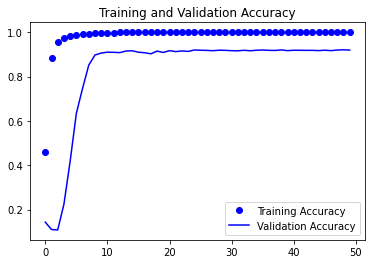

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

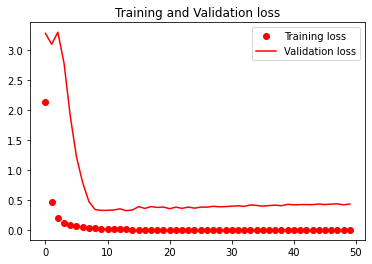

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [ ]:
predicted_classes = LeNet.predict_classes(X_test_gray_norm)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


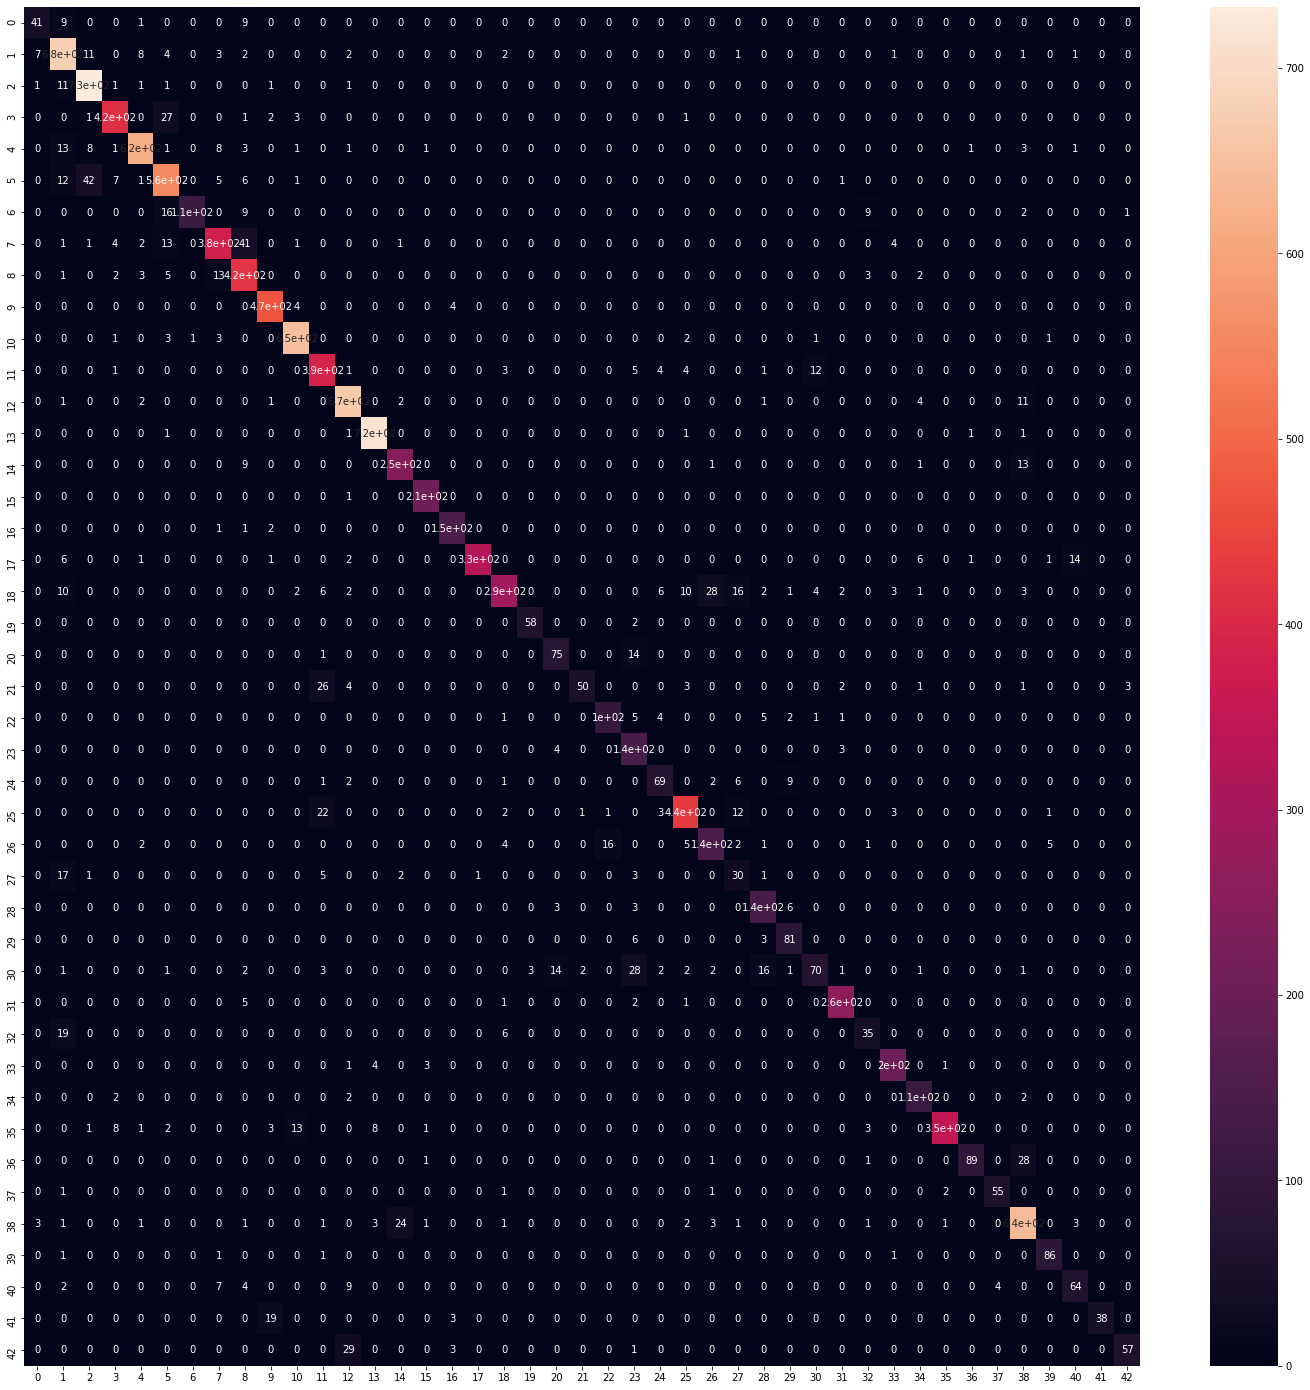

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        60
           1       0.86      0.94      0.90       720
           2       0.92      0.98      0.95       750
           3       0.94      0.92      0.93       450
           4       0.96      0.94      0.95       660
           5       0.88      0.88      0.88       630
           6       0.99      0.75      0.86       150
           7       0.90      0.85      0.88       450
           8       0.82      0.94      0.87       450
           9       0.94      0.98      0.96       480
          10       0.96      0.98      0.97       660
          11       0.85      0.93      0.89       420
          12       0.92      0.97      0.94       690
          13       0.98      0.99      0.99       720
          14       0.89      0.91      0.90       270
          15       0.97      1.00      0.98       210
          16       0.94      0.97      0.95       150
          17       1.00    

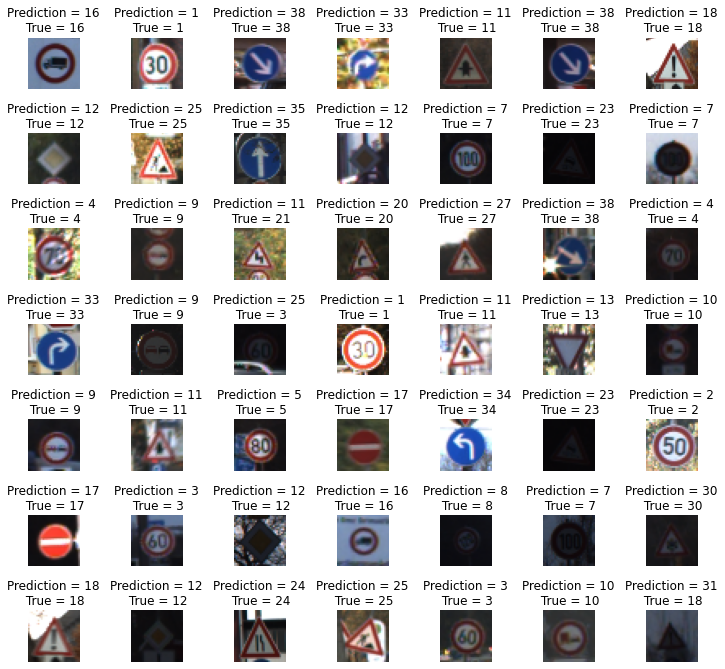

In [ ]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    